<a href="https://colab.research.google.com/github/Abdokarawia/Multiple-Linear-Regression/blob/main/Multiple-Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
EDS = pd.read_csv('/content/FuelConsumptionCo2.csv')
EDS.head()   # Showing a sample of the dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
EDS.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
DS = EDS [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]  # Dataset which we will work on
DS.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


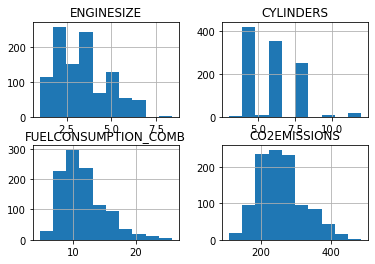

In [6]:
DS.hist()
plt.show()

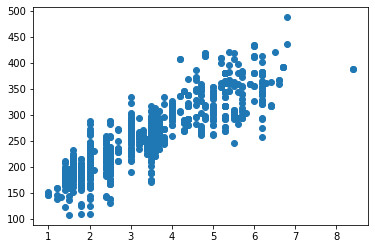

In [7]:
plt.scatter(DS.ENGINESIZE, DS.CO2EMISSIONS)
plt.show()

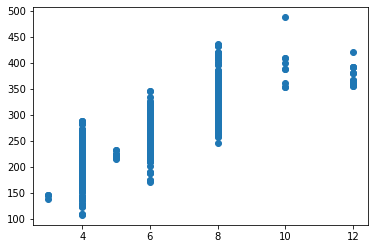

In [8]:
plt.scatter(DS.CYLINDERS, DS.CO2EMISSIONS)
plt.show()

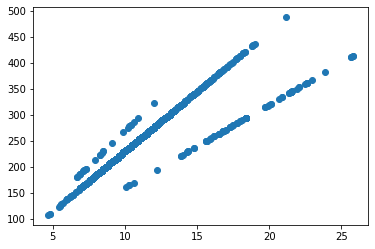

In [9]:
plt.scatter(DS.FUELCONSUMPTION_COMB, DS.CO2EMISSIONS)
plt.show()

In [10]:
mask = np.random.rand(len(DS)) < 0.8  # 80 %  of the DS will be true
train = DS[mask]
test  = DS[~mask]

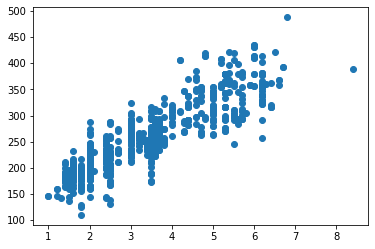

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
x_train = train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_train = train[['CO2EMISSIONS']]
LR.fit(x_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
Coef = LR.coef_
Inter = LR.intercept_
print(np.round(Coef, 2))
print(np.round(Inter, 2))

[[11.18  7.4   9.4 ]]
[67.18]


In [14]:
from sklearn.metrics import r2_score
test_x = test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
test_y = test[['CO2EMISSIONS']]
Ptest_y = LR.predict(test_x)
MAE = np.mean(np.abs(Ptest_y-test_y))
MSE = np.mean(np.abs((Ptest_y-test_y)** 2))
R2= r2_score(test_y , Ptest_y)  # R squared value best value is 1.00
print("Mean absolute error: %.2f" % MAE)
print("Residual sum of squares (MSE): %.2f" % MSE)
print("R2-score: %.4f" % R2 )

Mean absolute error: 14.38
Residual sum of squares (MSE): 410.99
R2-score: 0.8888
